In [26]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")

In [27]:
full_data = pd.read_csv('data/weatherAUS.csv')

In [28]:
full_data['Date'] = pd.to_datetime(full_data['Date'])
full_data['year'] = full_data['Date'].dt.year
full_data['month'] = full_data['Date'].dt.month
full_data['day'] = full_data['Date'].dt.day
full_data.drop(['Date'], axis = 1,inplace=True) 
full_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [29]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [30]:
full_data.shape


(145460, 25)

In [31]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5


In [32]:
# Get the count of each class in the oversampled dataset
class_counts = full_data['RainTomorrow'].value_counts()

# Display the counts
print("Class counts before oversampling:")
print(class_counts)

Class counts before oversampling:
0.0    110316
1.0     31877
Name: RainTomorrow, dtype: int64


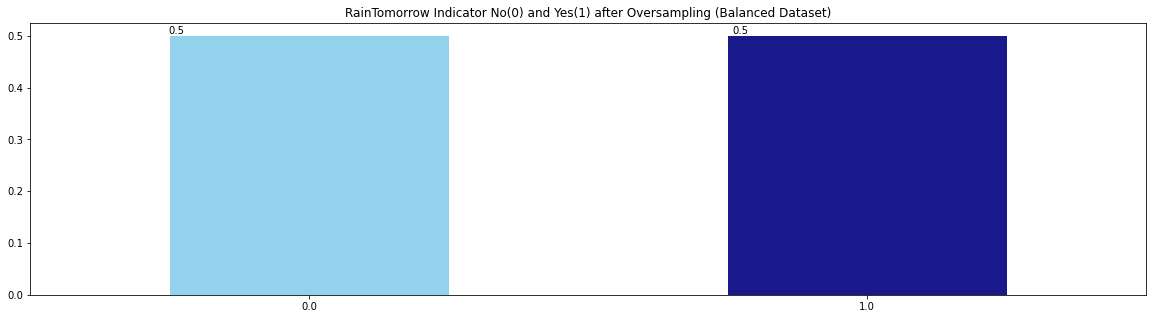

In [33]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (20,5))
ax=oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.show()

In [34]:

class_counts = oversampled['RainTomorrow'].value_counts()

print("Class counts after oversampling:")
print(class_counts)

Class counts after oversampling:
0.0    110316
1.0    110316
Name: RainTomorrow, dtype: int64


In [14]:
total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head()

,Total,Percent
Sunshine,104711,0.474596
Evaporation,95325,0.432054
Cloud3pm,85658,0.388239
Cloud9am,81388,0.368886
Pressure9am,21620,0.097991


In [15]:
oversampled.select_dtypes(include=['object']).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [35]:
#Filling the missing values for continuous variables with mean
oversampled['MinTemp']=oversampled['MinTemp'].fillna(oversampled['MinTemp'].mean())
oversampled['MaxTemp']=oversampled['MinTemp'].fillna(oversampled['MaxTemp'].mean())
oversampled['Rainfall']=oversampled['Rainfall'].fillna(oversampled['Rainfall'].mean())
oversampled['Evaporation']=oversampled['Evaporation'].fillna(oversampled['Evaporation'].mean())
oversampled['Sunshine']=oversampled['Sunshine'].fillna(oversampled['Sunshine'].mean())
oversampled['WindGustSpeed']=oversampled['WindGustSpeed'].fillna(oversampled['WindGustSpeed'].mean())
oversampled['WindSpeed9am']=oversampled['WindSpeed9am'].fillna(oversampled['WindSpeed9am'].mean())
oversampled['WindSpeed3pm']=oversampled['WindSpeed3pm'].fillna(oversampled['WindSpeed3pm'].mean())
oversampled['Humidity9am']=oversampled['Humidity9am'].fillna(oversampled['Humidity9am'].mean())
oversampled['Humidity3pm']=oversampled['Humidity3pm'].fillna(oversampled['Humidity3pm'].mean())
oversampled['Pressure9am']=oversampled['Pressure9am'].fillna(oversampled['Pressure9am'].mean())
oversampled['Pressure3pm']=oversampled['Pressure3pm'].fillna(oversampled['Pressure3pm'].mean())
oversampled['Cloud9am']=oversampled['Cloud9am'].fillna(oversampled['Cloud9am'].mean())
oversampled['Cloud3pm']=oversampled['Cloud3pm'].fillna(oversampled['Cloud3pm'].mean())
oversampled['Temp9am']=oversampled['Temp9am'].fillna(oversampled['Temp9am'].mean())
oversampled['Temp3pm']=oversampled['Temp3pm'].fillna(oversampled['Temp3pm'].mean())



In [36]:

(oversampled.isnull().sum()/len(oversampled))*100

Location         0.000000
MinTemp          0.000000
MaxTemp          0.000000
Rainfall         0.000000
Evaporation      0.000000
Sunshine         0.000000
WindGustDir      6.951847
WindGustSpeed    0.000000
WindDir9am       6.581094
WindDir3pm       2.859513
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
Humidity9am      0.000000
Humidity3pm      0.000000
Pressure9am      0.000000
Pressure3pm      0.000000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000000
Temp3pm          0.000000
RainToday        1.371515
RainTomorrow     0.000000
year             0.000000
month            0.000000
day              0.000000
dtype: float64

In [37]:
#Filling the missing values for continuous variables with mode

oversampled['RainToday']=oversampled['RainToday'].fillna(oversampled['RainToday'].mode()[0])
oversampled['RainTomorrow']=oversampled['RainTomorrow'].fillna(oversampled['RainTomorrow'].mode()[0])


In [38]:
#Filling the missing values for continuous variables with mode
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [39]:

(oversampled.isnull().sum()/len(oversampled))*100

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
year             0.0
month            0.0
day              0.0
dtype: float64

In [40]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [41]:
oversampled.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2,13.4,13.4,0.6,5.127132,6.499055,13,44.0,13,14,...,1007.1,8.00000,5.185977,16.9,21.8,0.0,0.0,2008,12,1
1,2,7.4,7.4,0.0,5.127132,6.499055,14,44.0,6,15,...,1007.8,5.03868,5.185977,17.2,24.3,0.0,0.0,2008,12,2
2,2,12.9,12.9,0.0,5.127132,6.499055,15,46.0,13,15,...,1008.7,5.03868,2.000000,21.0,23.2,0.0,0.0,2008,12,3
3,2,9.2,9.2,0.0,5.127132,6.499055,4,24.0,9,0,...,1012.8,5.03868,5.185977,18.1,26.5,0.0,0.0,2008,12,4
4,2,17.5,17.5,1.0,5.127132,6.499055,13,41.0,1,7,...,1006.0,7.00000,8.000000,17.8,29.7,0.0,0.0,2008,12,5


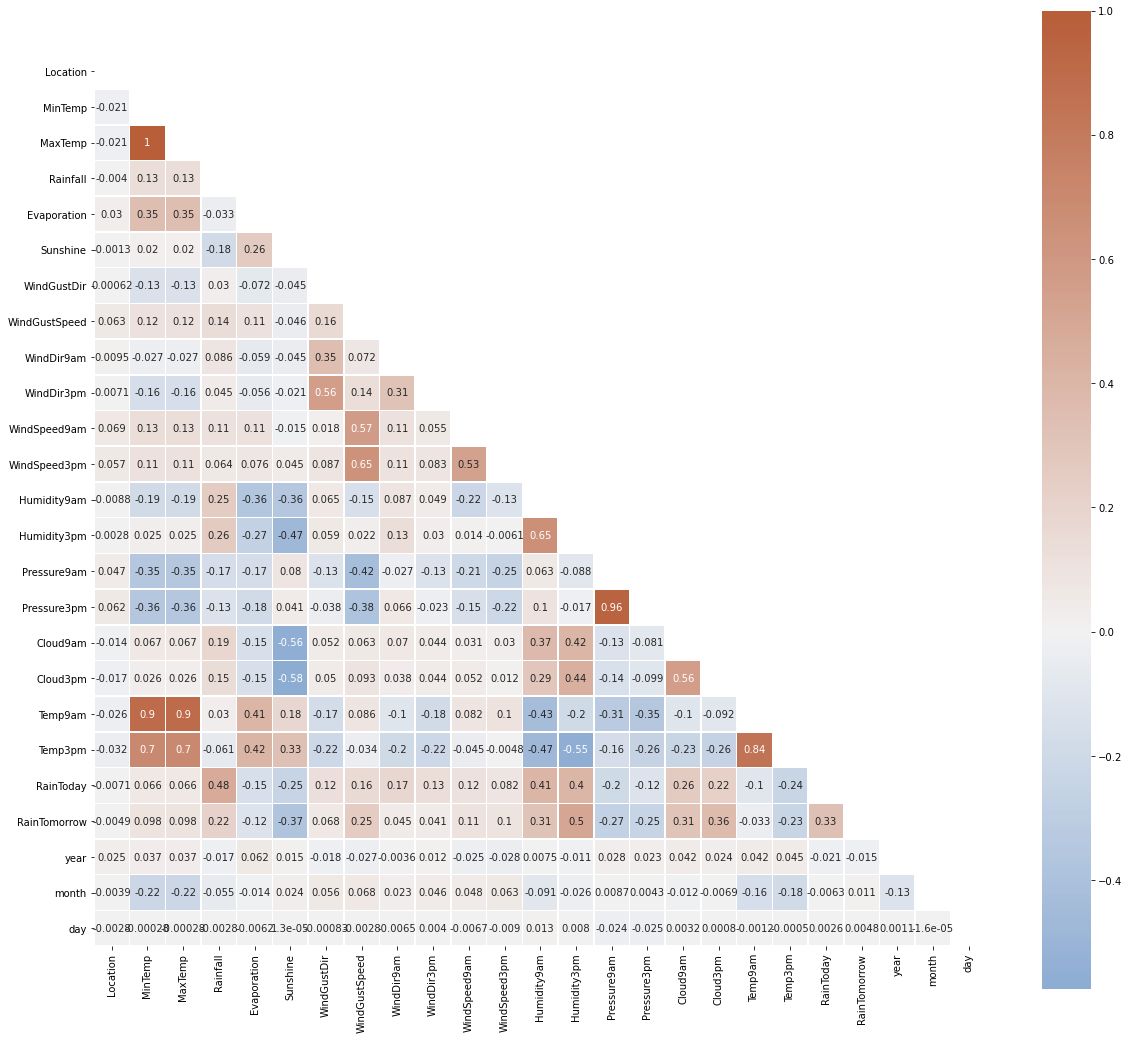

In [42]:
# Correlation Heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = oversampled.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

In [43]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(oversampled)
modified_data = pd.DataFrame(r_scaler.transform(oversampled), index=oversampled.index, columns=oversampled.columns)

In [44]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday'],
      dtype='object')


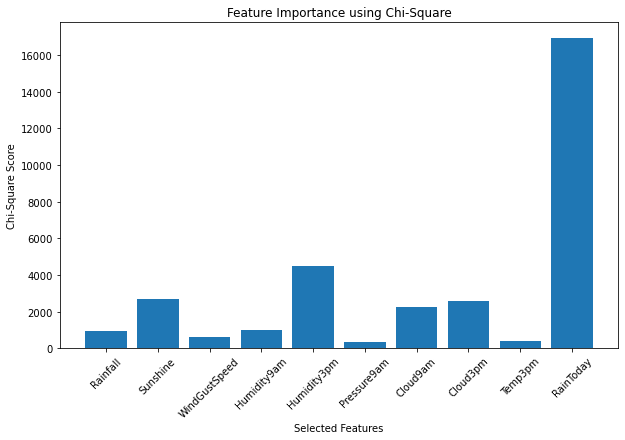

In [45]:

# Get selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get selected feature names
selected_feature_names = X.columns[selected_feature_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(selected_feature_names)), selector.scores_[selected_feature_indices], align='center')
plt.xticks(range(len(selected_feature_names)), selected_feature_names, rotation=45)
plt.xlabel('Selected Features')
plt.ylabel('Chi-Square Score')
plt.title('Feature Importance using Chi-Square')
plt.show()

In [46]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = oversampled.drop('RainTomorrow', axis=1)
y = oversampled['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm', 'Temp3pm']
[0.02791294 0.03504637 0.03530208 0.06354124 0.02289367 0.05427415
 0.02432779 0.05365829 0.02533826 0.02635399 0.02615433 0.02795346
 0.0469021  0.1673495  0.05175598 0.05580583 0.02597952 0.0428967
 0.03707074 0.04324901 0.03015965 0.021648   0.02345314 0.03097327]


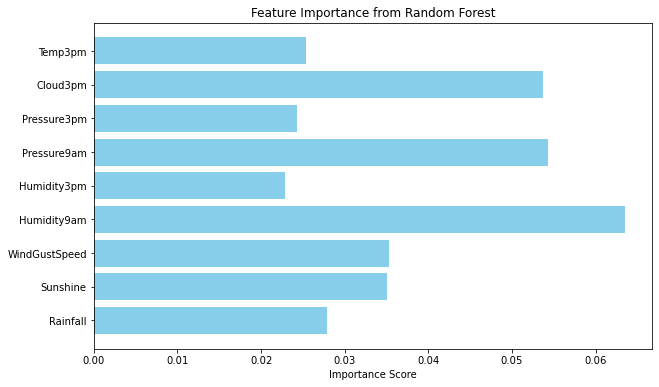

In [47]:
import matplotlib.pyplot as plt

feature_names = ['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm', 'Temp3pm']
importance_scores = [0.02791294, 0.03504637, 0.03530208, 0.06354124, 0.02289367, 0.05427415, 0.02432779, 0.05365829, 0.02533826]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance from Random Forest')
plt.show()


In [52]:

selected_features = ['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud3pm', 'Temp3pm']
features = oversampled[selected_features]
target = oversampled['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=target)

# Normalize Features
from sklearn.preprocessing import StandardScaler


In [54]:
# Normalize Features
scaler = StandardScaler()

# Fit and transform on the training set
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

# Create DataFrames for train and test sets
train_data = pd.DataFrame(X_train_scaled, columns=selected_features)
train_data['RainTomorrow'] = y_train.reset_index(drop=True)

test_data = pd.DataFrame(X_test_scaled, columns=selected_features)
test_data['RainTomorrow'] = y_test.reset_index(drop=True)
# Save DataFrames as CSV files
train_data.to_csv('data/train_data.csv', index=False)
test_data.to_csv('data/test_data.csv', index=False)

In [55]:
# Load the CSV files
train_data = pd.read_csv('data/train_data.csv')
test_data = pd.read_csv('data/test_data.csv')

# Display the first few rows of the loaded DataFrames to verify the data
print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   Rainfall  Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  Pressure9am  \
0 -0.083571  0.001012       1.055149     1.404182     1.873651    -0.001497   
1 -0.332819 -0.419556      -1.278734     0.970936     0.155975     1.933694   
2 -0.315015 -1.892706      -0.995839     0.429378     0.388094     0.069905   
3 -0.279409 -2.278531       0.842978     1.187559     0.480941    -0.747294   
4 -0.332819 -0.314331       1.196596    -0.816205     0.666636    -0.345863   

   Pressure3pm  Cloud3pm   Temp3pm  RainTomorrow  
0    -0.001371 -0.000238 -2.339486           1.0  
1     2.095232 -0.000238 -0.841089           0.0  
2     0.039409  0.883369  0.788235           0.0  
3    -0.148800  0.883369 -0.695614           0.0  
4    -0.090889  0.883369 -1.262968           1.0  

Test Data:
   Rainfall  Sunshine  WindGustSpeed  Humidity9am  Humidity3pm  Pressure9am  \
0 -0.332819  1.544644       1.974557    -1.195296    -1.376006    -0.546579   
1  0.343712  0.246869       1.196596 